In [37]:
# import necessary libraries
import wave 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.optimizers import Adamax

## Read in dataframe 

In [ ]:
# Set display options to 200 columns to be able to see all 193 columns
pd.set_option('display.max_columns', 200)

In [2]:
full_df = pd.read_pickle('full_df.pkl')
full_df.shape # (64483, 198)
full_df.head()

,id,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,...,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,name,gender,nationality,set
0,10332,-274.717176,124.096613,-57.174884,47.091800,-31.190586,-3.631755,-34.891319,-4.590279,-0.825808,...,0.004705,0.003553,-0.009748,0.026007,0.001958,-0.009467,Gemma_Atkinson,f,UK,dev
1,10332,-263.282737,110.169695,-37.532975,49.808548,-30.783113,4.530054,-34.272742,-0.396505,2.088190,...,-0.008559,0.001090,-0.052647,0.053715,-0.014433,-0.001219,Gemma_Atkinson,f,UK,dev
2,10332,-255.330134,107.140581,-37.526152,66.718413,-25.090227,5.835736,-34.682863,0.156228,0.196809,...,-0.000381,0.004534,0.003975,0.063643,-0.003111,-0.009005,Gemma_Atkinson,f,UK,dev
3,10332,-238.647293,116.777418,-43.337226,57.847068,-29.790134,4.556106,-29.883005,-1.273415,0.166903,...,-0.015756,-0.000640,0.002584,0.037222,-0.006243,0.002152,Gemma_Atkinson,f,UK,dev
4,10332,-253.325462,110.840374,-47.403615,46.822241,-28.057003,5.674004,-26.317193,-0.719588,1.632264,...,-0.006521,0.009226,0.008907,0.020127,0.001455,0.002741,Gemma_Atkinson,f,UK,dev


In [3]:
# Binarize gender column
le_gender = LabelEncoder()
full_df.gender = le_gender.fit_transform(full_df.gender)
full_df.gender.unique() # array([0, 1])
full_df.head()

,id,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,...,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,name,gender,nationality,set
0,10332,-274.717176,124.096613,-57.174884,47.091800,-31.190586,-3.631755,-34.891319,-4.590279,-0.825808,...,0.004705,0.003553,-0.009748,0.026007,0.001958,-0.009467,Gemma_Atkinson,0,UK,dev
1,10332,-263.282737,110.169695,-37.532975,49.808548,-30.783113,4.530054,-34.272742,-0.396505,2.088190,...,-0.008559,0.001090,-0.052647,0.053715,-0.014433,-0.001219,Gemma_Atkinson,0,UK,dev
2,10332,-255.330134,107.140581,-37.526152,66.718413,-25.090227,5.835736,-34.682863,0.156228,0.196809,...,-0.000381,0.004534,0.003975,0.063643,-0.003111,-0.009005,Gemma_Atkinson,0,UK,dev
3,10332,-238.647293,116.777418,-43.337226,57.847068,-29.790134,4.556106,-29.883005,-1.273415,0.166903,...,-0.015756,-0.000640,0.002584,0.037222,-0.006243,0.002152,Gemma_Atkinson,0,UK,dev
4,10332,-253.325462,110.840374,-47.403615,46.822241,-28.057003,5.674004,-26.317193,-0.719588,1.632264,...,-0.006521,0.009226,0.008907,0.020127,0.001455,0.002741,Gemma_Atkinson,0,UK,dev


In [4]:
# Label Encode nationality column
le_nationality = LabelEncoder()
full_df.nationality = le_nationality.fit_transform(full_df.nationality)
full_df.nationality.unique()
full_df.head()
# le_nationality.classes_

,id,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,mfcc,...,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,tonnetz,name,gender,nationality,set
0,10332,-274.717176,124.096613,-57.174884,47.091800,-31.190586,-3.631755,-34.891319,-4.590279,-0.825808,...,0.004705,0.003553,-0.009748,0.026007,0.001958,-0.009467,Gemma_Atkinson,0,22,dev
1,10332,-263.282737,110.169695,-37.532975,49.808548,-30.783113,4.530054,-34.272742,-0.396505,2.088190,...,-0.008559,0.001090,-0.052647,0.053715,-0.014433,-0.001219,Gemma_Atkinson,0,22,dev
2,10332,-255.330134,107.140581,-37.526152,66.718413,-25.090227,5.835736,-34.682863,0.156228,0.196809,...,-0.000381,0.004534,0.003975,0.063643,-0.003111,-0.009005,Gemma_Atkinson,0,22,dev
3,10332,-238.647293,116.777418,-43.337226,57.847068,-29.790134,4.556106,-29.883005,-1.273415,0.166903,...,-0.015756,-0.000640,0.002584,0.037222,-0.006243,0.002152,Gemma_Atkinson,0,22,dev
4,10332,-253.325462,110.840374,-47.403615,46.822241,-28.057003,5.674004,-26.317193,-0.719588,1.632264,...,-0.006521,0.009226,0.008907,0.020127,0.001455,0.002741,Gemma_Atkinson,0,22,dev


## Feature visualization

### MFCC

In [ ]:
sns.set()
plt.figure(figsize=(10, 7))
# Miranda Cosgrove
idd = 10829
mfcc_df = full_df[full_df.id == idd].mfcc
for row in range(0,mfcc_df.shape[0]):
    audio_clip = mfcc_df.iloc[row,1:]
    sns.lineplot(x = range(0,len(mfcc_df.columns)-1), y = audio_clip)
plt.title('Miranda Cosgrove MFCC')
plt.xlabel('MFCC Coefficients (40)')
plt.ylabel('MFCC Values')
plt.text(25,150,'MFCC of various audio clips', fontsize = 14)

In [ ]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 11098
mfcc_df = full_df[full_df.id == idd].mfcc
for row in range(0,mfcc_df.shape[0]):
    audio_clip = mfcc_df.iloc[row,1:]
    sns.lineplot(x = range(0,len(mfcc_df.columns)-1), y = audio_clip)
plt.title('Smokey Robinson MFCC')
plt.xlabel('MFCC Coefficients (40)')
plt.ylabel('MFCC Values')
plt.text(25,150,'MFCC of various audio clips', fontsize = 14)

### Chroma

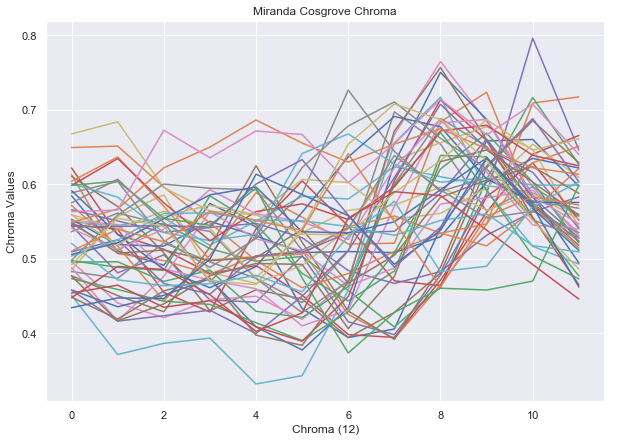

In [15]:
sns.set()
plt.figure(figsize=(10, 7))
# Miranda Cosgrove
idd = 10829
chroma_df = full_df[full_df.id == idd].chroma
for row in range(0,chroma_df.shape[0]):
    audio_clip = chroma_df.iloc[row,:]
    sns.lineplot(x = range(0,len(chroma_df.columns)), y = audio_clip);
plt.title('Miranda Cosgrove Chroma');
plt.xlabel('Chroma (12)');
plt.ylabel('Chroma Values');
plt.text(8,0.25,'Chroma of various audio clips', fontsize = 12);

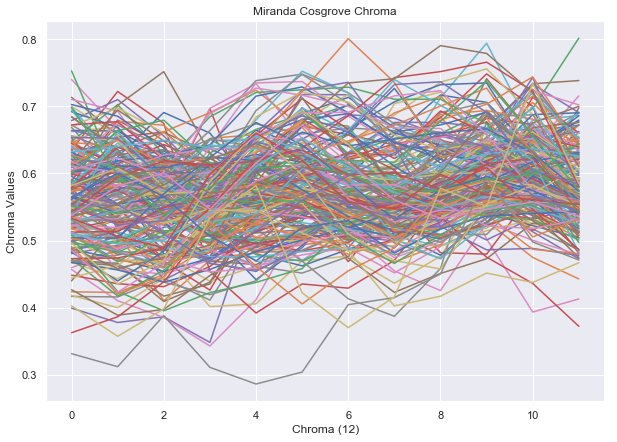

In [17]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 11098
chroma_df = full_df[full_df.id == idd].chroma
for row in range(0,chroma_df.shape[0]):
    audio_clip = chroma_df.iloc[row,:]
    sns.lineplot(x = range(0,len(chroma_df.columns)), y = audio_clip);
plt.title('Smokey Robinson Chroma');
plt.xlabel('Chroma (12)');
plt.ylabel('Chroma Values');
plt.text(8,0.25,'Chroma of various audio clips', fontsize = 12);

### Mel

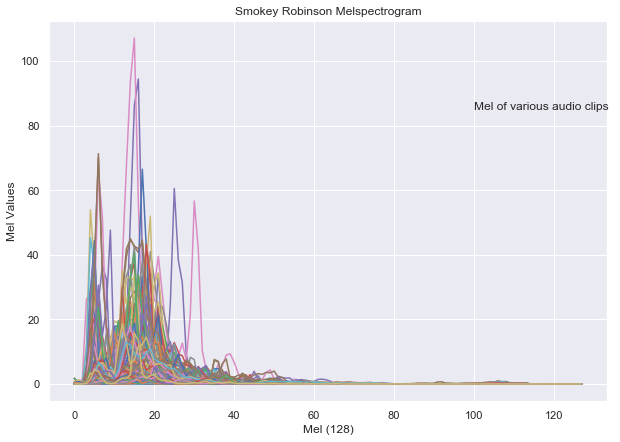

In [20]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 11098
mel_df = full_df[full_df.id == idd].mel
for row in range(0,mel_df.shape[0]):
    audio_clip = mel_df.iloc[row,:]
    sns.lineplot(x = range(0,len(mel_df.columns)), y = audio_clip);
plt.title('Smokey Robinson Melspectrogram');
plt.xlabel('Mel (128)');
plt.ylabel('Mel Values');
plt.text(100,85,'Mel of various audio clips', fontsize = 12);

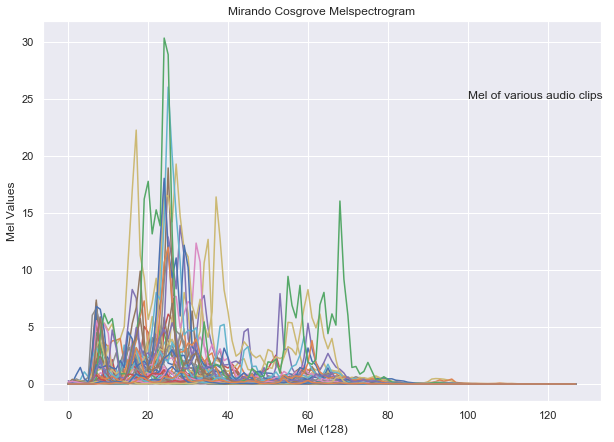

In [23]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 10829
mel_df = full_df[full_df.id == idd].mel
for row in range(0,mel_df.shape[0]):
    audio_clip = mel_df.iloc[row,:]
    sns.lineplot(x = range(0,len(mel_df.columns)), y = audio_clip);
plt.title('Mirando Cosgrove Melspectrogram');
plt.xlabel('Mel (128)');
plt.ylabel('Mel Values');
plt.text(100,25,'Mel of various audio clips', fontsize = 12);

### Tonnetz

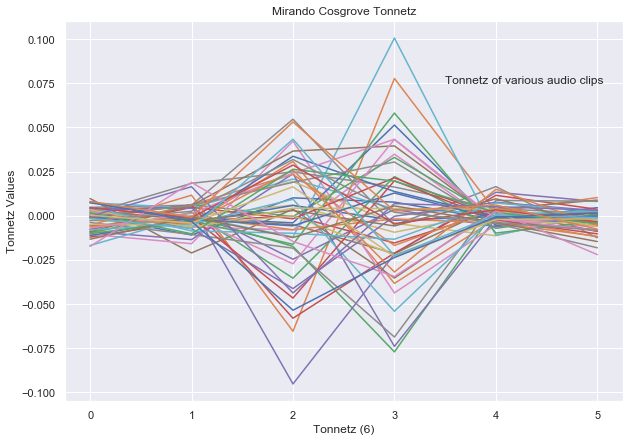

In [31]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 10829
ton_df = full_df[full_df.id == idd].tonnetz
for row in range(0,ton_df.shape[0]):
    audio_clip = ton_df.iloc[row,:]
    sns.lineplot(x = range(0,len(ton_df.columns)), y = audio_clip);
plt.title('Mirando Cosgrove Tonnetz');
plt.xlabel('Tonnetz (6)');
plt.ylabel('Tonnetz Values');
plt.text(3.5,0.075,'Tonnetz of various audio clips', fontsize = 12);

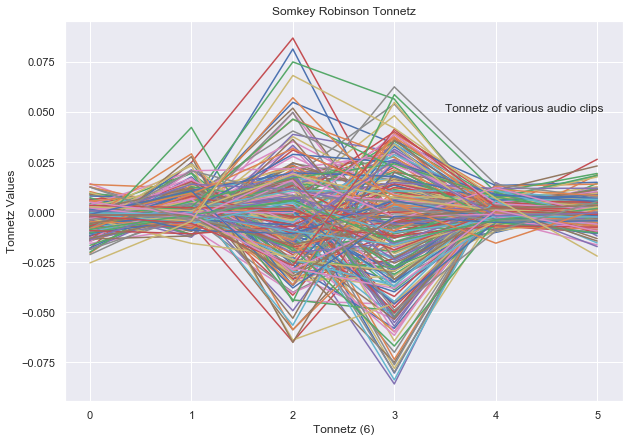

In [30]:
sns.set()
plt.figure(figsize=(10, 7))
# Smokey Robinson
idd = 11098
ton_df = full_df[full_df.id == idd].tonnetz
for row in range(0,ton_df.shape[0]):
    audio_clip = ton_df.iloc[row,:]
    sns.lineplot(x = range(0,len(ton_df.columns)), y = audio_clip);
plt.title('Somkey Robinson Tonnetz');
plt.xlabel('Tonnetz (6)');
plt.ylabel('Tonnetz Values');
plt.text(3.5,0.050,'Tonnetz of various audio clips', fontsize = 12);

## Read in Model

In [35]:
# Read in model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()

json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_weights.h5")
print("Loaded model into notebook")

Loaded model into notebook


In [38]:
# Compile the model with a specified Adamax optimizer
opt = Adamax(lr = 1e-3, decay = 1e-5) # Adamax has shown to yield faster learning than Adam and SGD
loaded_model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt,
             metrics = ['accuracy'])

In [39]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 128)            49536     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 256)            65792     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 256)            131328    
__________